In [1]:
import random
import numpy as np
import tensorflow as tf
import mlflow.keras

from ml_investing_wne import config
from ml_investing_wne.utils import get_logger
from ml_investing_wne.experiment_factory import create_asset, experiment_factory

random.seed(config.seed)
np.random.seed(config.seed)
tf.random.set_seed(config.seed)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 41)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 96, 4)        824         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 96, 4)       16          ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 96, 4)        0           ['batch_normalization[0][0]']

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

In [3]:
config.currency = 'MATICUSDT'

In [4]:
asset = create_asset()
experiment = experiment_factory(asset).get_experiment()

In [5]:
experiment.df.head(1)

,open,close,high,low,volume,y_pred,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_15,EMA_15,VAR_15,SMA_20,EMA_20,VAR_20,SMA_50,EMA_50,VAR_50,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-05-03 03:00:00,0.00416,0.00412,0.00416,0.00411,7734322.0,0,0.004164,0.004153,1.630000e-09,0.004165,0.004171,1.472222e-09,0.004169,0.004188,1.820952e-09,0.004212,0.004201,8.111579e-09,0.004236,0.004236,1.189833e-08,-0.000031,-0.000009,-0.000023,41.993413,39.868096,35.776194,18.191312,26.176702,-89.473684,0.004092,0.004164,0.004236,3.46887,0.195383,-0.007229,3,4,0.730836,0.682553,-0.866025,-0.5


In [6]:
config.currency = 'BTCUSDT'
btc = create_asset()
experiment_btc = experiment_factory(btc).get_experiment()

In [7]:
experiment_btc.df.head(1)

,open,close,high,low,volume,y_pred,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_15,EMA_15,VAR_15,SMA_20,EMA_20,VAR_20,SMA_50,EMA_50,VAR_50,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-03 03:00:00,15008.07,14818.49,15299.99,14750.0,1031.188608,1,14819.24,14818.254738,14607.5875,14765.231,14646.319469,12788.192054,14416.116,14469.127362,272643.817283,14177.9435,14323.774751,381592.755245,13692.237,13692.237,335315.742319,387.756403,62.801498,324.954905,67.673225,67.802526,64.259943,70.407261,68.600551,-33.240463,14603.035745,14819.24,15035.444255,2.917886,0.498266,-0.012632,3,2,0.730836,0.682553,0.866025,-0.5


In [8]:
# experiment_btc.df = experiment_btc.df.add_prefix('btc_')
experiment_btc.df.rename(columns={'close':'close_btc', 'volume':'volume_btc', 'roc_1': 'roc_1_btc'}, inplace=True)

In [9]:
experiment_btc.df.head(1)

,open,close_btc,high,low,volume_btc,y_pred,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_15,EMA_15,VAR_15,SMA_20,EMA_20,VAR_20,SMA_50,EMA_50,VAR_50,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1_btc,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-03 03:00:00,15008.07,14818.49,15299.99,14750.0,1031.188608,1,14819.24,14818.254738,14607.5875,14765.231,14646.319469,12788.192054,14416.116,14469.127362,272643.817283,14177.9435,14323.774751,381592.755245,13692.237,13692.237,335315.742319,387.756403,62.801498,324.954905,67.673225,67.802526,64.259943,70.407261,68.600551,-33.240463,14603.035745,14819.24,15035.444255,2.917886,0.498266,-0.012632,3,2,0.730836,0.682553,0.866025,-0.5


In [10]:
# experiment.df =  experiment.df[['close', 'volume', 'roc_1','y_pred']].merge(experiment_btc.df.drop(columns=['btc_y_pred']), left_index=True, right_index=True)
experiment.df =  experiment.df.merge(experiment_btc.df[['close_btc', 'volume_btc','roc_1_btc']], left_index=True, right_index=True)
experiment.df.head(1)

,open,close,high,low,volume,y_pred,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_15,EMA_15,VAR_15,SMA_20,EMA_20,VAR_20,SMA_50,EMA_50,VAR_50,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos,close_btc,volume_btc,roc_1_btc
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-05-03 03:00:00,0.00416,0.00412,0.00416,0.00411,7734322.0,0,0.004164,0.004153,1.630000e-09,0.004165,0.004171,1.472222e-09,0.004169,0.004188,1.820952e-09,0.004212,0.004201,8.111579e-09,0.004236,0.004236,1.189833e-08,-0.000031,-0.000009,-0.000023,41.993413,39.868096,35.776194,18.191312,26.176702,-89.473684,0.004092,0.004164,0.004236,3.46887,0.195383,-0.007229,3,4,0.730836,0.682553,-0.866025,-0.5,5579.46,1052.537119,-0.001468


In [11]:
config.currency = 'ETHUSDT'
eth = create_asset()
experiment_eth = experiment_factory(eth).get_experiment()
experiment_eth.df.rename(columns={'close':'close_eth', 'volume':'volume_eth', 'roc_1': 'roc_1_eth'}, inplace=True)
experiment.df = experiment.df[['close', 'volume', 'roc_1','y_pred', 'close_btc', 'volume_btc','roc_1_btc']].merge(experiment_eth.df[['close_eth', 'volume_eth','roc_1_eth']], left_index=True, right_index=True)
# experiment.df = experiment.df.merge(experiment_eth.df[['close_eth', 'volume_eth','roc_1_eth']], left_index=True, right_index=True)
experiment.df.head(1)

,close,volume,roc_1,y_pred,close_btc,volume_btc,roc_1_btc,close_eth,volume_eth,roc_1_eth
datetime,,,,,,,,,,
2019-05-03 03:00:00,0.00412,7734322.0,-0.007229,0,5579.46,1052.537119,-0.001468,162.42,6054.32841,-0.004352


In [12]:
experiment_eth.df.head(10)

,open,close_eth,high,low,volume_eth,y_pred,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_15,EMA_15,VAR_15,SMA_20,EMA_20,VAR_20,SMA_50,EMA_50,VAR_50,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1_eth,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-03 03:00:00,857.05,853.07,867.26,850.03,3474.59547,1,861.896,859.104824,86.67393,858.194,858.429704,59.730516,859.737333,855.029002,48.305678,855.5140,849.866579,99.606941,804.6796,804.679600,2878.260028,16.048164,-4.371327,20.419490,55.424501,51.432384,44.109289,65.701965,74.355965,-42.558015,845.241974,861.896,878.550026,3.864509,0.235019,-0.007735,3,2,0.730836,0.682553,0.866025,-0.5
2018-01-03 04:00:00,854.16,861.43,864.99,853.12,3010.12424,1,863.126,859.879883,73.89423,858.844,858.975212,59.240849,859.702667,855.829127,48.159335,856.7645,850.967857,80.614479,807.4272,806.905106,2803.607176,15.185175,-4.187452,19.372627,58.597710,56.284887,53.515036,64.114875,69.484534,-31.408376,847.748694,863.126,878.503306,3.563166,0.444854,0.0098,4,2,0.887885,0.460065,0.866025,-0.5
2018-01-03 05:00:00,862.47,876.11,878.0,861.27,3358.63487,0,863.066,865.289922,71.91963,861.358,862.090628,78.453396,860.981333,858.364236,65.087055,858.7175,853.362347,75.840936,810.2594,809.619023,2783.155802,15.507048,-3.092463,18.599511,63.509969,63.416415,65.683953,71.401263,67.072701,-11.829821,847.895541,863.066,878.236459,3.515481,0.929914,0.017041,5,2,0.979084,0.203456,0.866025,-0.5
2018-01-03 06:00:00,876.11,874.0,877.0,866.77,4374.99813,0,864.866,868.193281,96.82263,863.411,864.255969,84.614677,861.544000,860.318706,75.356526,859.9925,855.327837,80.927514,812.8430,812.143767,2771.865997,15.414190,-2.548257,17.962447,62.364624,61.806153,62.846315,80.705966,72.074035,-14.643905,847.263943,864.866,882.468057,4.070470,0.759458,-0.002408,6,2,0.997669,-0.068242,0.866025,-0.5
2018-01-03 07:00:00,874.94,876.02,879.53,870.0,2687.39808,0,868.126,870.802187,108.02073,864.960,866.394883,98.691644,862.478667,862.281368,89.373855,861.3385,857.298520,86.295929,815.3836,814.648718,2763.527126,15.326917,-2.108424,17.435341,63.051603,62.810631,64.603079,87.192140,79.766456,-11.949853,849.533896,868.126,886.718104,4.283273,0.712294,0.002311,7,2,0.942261,-0.334880,0.866025,-0.5
2018-01-03 08:00:00,876.03,867.63,877.66,863.54,3487.89399,0,871.038,869.744792,40.81177,866.467,866.619450,79.875912,862.475333,862.949947,89.336870,862.5625,858.282470,69.390557,817.4926,816.726415,2756.928538,14.414588,-2.416603,16.831190,58.292195,56.012357,52.281847,83.422246,83.773451,-23.139504,859.610067,871.038,882.465933,2.623980,0.350892,-0.009577,8,2,0.816970,-0.576680,0.866025,-0.5
2018-01-03 09:00:00,868.77,843.01,869.48,842.0,5857.11103,0,867.354,860.833194,197.16073,865.240,862.326823,125.434422,861.680667,860.457454,111.657921,861.6155,856.827949,88.547868,819.3130,817.757144,2679.272503,11.571542,-4.207718,15.779261,47.065116,41.401762,31.276600,62.386541,77.666976,-77.751019,842.235992,867.354,892.472008,5.791870,0.015407,-0.028376,9,2,0.631088,-0.775711,0.866025,-0.5
2018-01-03 10:00:00,843.0,846.11,849.5,820.0,6253.93991,1,861.354,855.925463,245.82073,862.210,859.378310,142.032089,861.356667,858.664022,120.668824,861.0745,855.807192,99.738026,821.3352,818.869021,2577.051944,9.459509,-5.055801,14.515310,48.412403,43.464923,35.209758,46.430357,64.079715,-59.818406,833.307140,861.354,889.400860,6.512272,0.228241,0.003677,10,2,0.398401,-0.917211,0.866025,-0.5
2018-01-03 11:00:00,846.11,863.02,864.99,843.23,3374.07674,0,859.158,858.290309,200.50627,862.012,860.040435,141.196529,861.993333,859.208519,115.989324,860.9475,856.494126,98.861325,823.5314,820.600432,2512.876739,9.045927,-4.375506,13.421434,55.122291,53.407596,52.867062,42.878521,50.565140,-33.795014,833.827780,859.158,884.488220,5.896522,0.576233,0.019986,11,2,0.136167,-0.990686,0.866025,-0.5


In [13]:
config.currency = 'SOLUSDT'
sol = create_asset()
experiment_sol = experiment_factory(sol).get_experiment()
experiment_sol.df.head(1)


,open,close,high,low,volume,y_pred,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_15,EMA_15,VAR_15,SMA_20,EMA_20,VAR_20,SMA_50,EMA_50,VAR_50,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-13 09:00:00,3.73,3.8387,3.95,3.5003,155172.89,1,3.85914,3.834083,0.019735,3.79133,3.804312,0.015277,3.765053,3.77242,0.011548,3.762845,3.736754,0.008846,3.472844,3.472844,0.096345,0.104266,-0.00887,0.113136,56.113257,54.840987,53.079973,57.788831,68.27237,-46.992481,3.607841,3.85914,4.110439,13.023574,0.459331,0.028315,9,3,0.631088,-0.775711,1.224647e-16,-1.0


In [14]:
experiment_sol.df =  experiment_sol.df[['close', 'volume', 'roc_1','y_pred']].merge(experiment_btc.df[['close_btc', 'volume_btc','roc_1_btc']], left_index=True, right_index=True)
# experiment_sol.df =  experiment_sol.df.merge(experiment_btc.df[['close_btc', 'volume_btc','roc_1_btc']], left_index=True, right_index=True)
experiment_sol.df = experiment_sol.df[['close', 'volume', 'roc_1','y_pred', 'close_btc', 'volume_btc','roc_1_btc']].merge(experiment_eth.df[['close_eth', 'volume_eth','roc_1_eth']], left_index=True, right_index=True)
# experiment_sol.df = experiment_sol.df.merge(experiment_eth.df[['close_eth', 'volume_eth','roc_1_eth']], left_index=True, right_index=True)
experiment_sol.df.head(1)

,close,volume,roc_1,y_pred,close_btc,volume_btc,roc_1_btc,close_eth,volume_eth,roc_1_eth
datetime,,,,,,,,,,
2020-08-13 09:00:00,3.8387,155172.89,0.028315,1,11402.63,4899.807958,-0.001104,386.4,70776.95626,0.008904


In [15]:
config.currency = 'LTCUSDT'
ltc = create_asset()
experiment_ltc = experiment_factory(ltc).get_experiment()
experiment_ltc.df.head(1)

,open,close,high,low,volume,y_pred,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_15,EMA_15,VAR_15,SMA_20,EMA_20,VAR_20,SMA_50,EMA_50,VAR_50,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-03 03:00:00,247.63,245.36,250.0,244.38,1977.86041,1,248.078,247.495809,4.78487,247.676,247.380686,2.73396,248.330667,246.425556,8.10225,246.5,245.097879,19.881211,234.5576,234.5576,137.433749,3.960277,-0.948577,4.908854,53.867584,50.065975,41.102798,54.678204,58.542155,-60.1947,244.164998,248.078,251.991002,3.154655,0.152696,-0.009207,3,2,0.730836,0.682553,0.866025,-0.5


In [16]:
experiment_ltc.df =  experiment_ltc.df[['close', 'volume', 'roc_1','y_pred']].merge(experiment_btc.df[['close_btc', 'volume_btc','roc_1_btc']], left_index=True, right_index=True)
experiment_ltc.df = experiment_ltc.df[['close', 'volume', 'roc_1','y_pred','close_btc', 'volume_btc','roc_1_btc']].merge(experiment_eth.df[['close_eth', 'volume_eth','roc_1_eth']], left_index=True, right_index=True)
# experiment_ltc.df =  experiment_ltc.df.merge(experiment_btc.df[['close_btc', 'volume_btc','roc_1_btc']], left_index=True, right_index=True)
# experiment_ltc.df = experiment_ltc.df.merge(experiment_eth.df[['close_eth', 'volume_eth','roc_1_eth']], left_index=True, right_index=True)
experiment_ltc.df.head(1)

,close,volume,roc_1,y_pred,close_btc,volume_btc,roc_1_btc,close_eth,volume_eth,roc_1_eth
datetime,,,,,,,,,,
2018-01-03 03:00:00,245.36,1977.86041,-0.009207,1,14818.49,1031.188608,-0.012632,853.07,3474.59547,-0.007735


In [17]:
experiment.train_test_val_split()

2023-08-09 17:52:25.416501: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [18]:
experiment_sol.train_test_val_split()

In [19]:
experiment_ltc.train_test_val_split()

In [20]:
# experiment.X = np.concatenate([experiment.X, experiment_sol.X, experiment_ltc.X])
# experiment.X_val = np.concatenate([experiment.X_val, experiment_sol.X_val, experiment_ltc.X_val])
# experiment.X_test = np.concatenate([experiment.X_test, experiment_sol.X_test, experiment_ltc.X_test])

# experiment.y_cat = np.concatenate([experiment.y_cat, experiment_sol.y_cat, experiment_ltc.y_cat])
# experiment.y_val_cat = np.concatenate([experiment.y_val_cat, experiment_sol.y_val_cat, experiment_ltc.y_val_cat])
# experiment.y_test_cat = np.concatenate([experiment.y_test_cat, experiment_sol.y_test_cat, experiment_ltc.y_test_cat])

# experiment.y_test = np.concatenate([experiment.y_test, experiment_sol.y_test, experiment_ltc.y_test])

experiment.train_dataset = experiment.train_dataset.concatenate(experiment_sol.train_dataset)
experiment.train_dataset = experiment.train_dataset.concatenate(experiment_ltc.train_dataset)

experiment.val_dataset = experiment.val_dataset.concatenate(experiment_sol.val_dataset)
experiment.val_dataset = experiment.val_dataset.concatenate(experiment_ltc.val_dataset)

experiment.test_dataset = experiment.test_dataset.concatenate(experiment_sol.test_dataset)
experiment.test_dataset = experiment.test_dataset.concatenate(experiment_ltc.test_dataset)


In [21]:
experiment.train_model()

2023/08/09 17:53:52 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023/08/09 17:53:53 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '437245cc577b4d868dceb85f4638a807', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.51076, saving model to /Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/models/resnet_lstm_regularized_tunned_small_Binance_LTCUSDT_60min_1.h5
163/163 - 8s - loss: 0.6930 - accuracy: 0.5195 - val_loss: 0.6949 - val_accuracy: 0.5108 - 8s/epoch - 52ms/step
Epoch 2/100

Epoch 2: val_accuracy improved from 0.51076 to 0.51215, saving model to /Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/models/resnet_lstm_regularized_tunned_small_Binance_LTCUSDT_60min_1.h5
163/163 - 6s - loss: 0.6911 - accuracy: 0.5249 - val_loss: 0.6982 - val_accuracy: 0.5121 - 6s/epoch - 37ms/step
Epoch 3/100

Epoch 3: val_accuracy improved from 0.51215 to 0.51902, saving model to /Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/models/resnet_lstm_regularized_tunned_small_Binance_LTCUSDT_60min_1.h5
163/163 - 6s - loss: 0.6898 - accuracy: 0.5321 - val_loss: 0.7034 - val_accuracy: 0.5190 - 6s/e

INFO:tensorflow:Assets written to: /var/folders/9g/0tl60q4d1zbb_1ggbb19w_4c0000gp/T/tmpr1_2upx0/model/data/model/assets


INFO:tensorflow:Assets written to: /var/folders/9g/0tl60q4d1zbb_1ggbb19w_4c0000gp/T/tmpr1_2upx0/model/data/model/assets
2023/08/09 17:56:55 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/i0495036/Documents/sandbox/ml_investing_wne/.conda/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


INFO:tensorflow:Assets written to: /Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/models/production/resnet_lstm_regularized_tunned_small_Binance_LTCUSDT_60min_1_96/assets


INFO:tensorflow:Assets written to: /Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/models/production/resnet_lstm_regularized_tunned_small_Binance_LTCUSDT_60min_1_96/assets


In [22]:
experiment.evaluate_model()

102/102 [==============================] - 1s 11ms/step


ValueError: Length of values (12963) does not match length of index (4321)

In [23]:
from sklearn.metrics import precision_recall_curve

In [24]:
y_pred = experiment.model.predict(experiment.test_dataset)
y_pred_class = y_pred.argmax(axis=-1)
y_pred_class

102/102 [==============================] - 1s 10ms/step


array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
experiment.y_test

In [29]:
y_pred[100:120]

array([[0.56688684, 0.43311316],
       [0.67781585, 0.32218423],
       [0.5740821 , 0.42591786],
       [0.62731826, 0.37268177],
       [0.65069747, 0.34930256],
       [0.640155  , 0.35984498],
       [0.6153594 , 0.38464057],
       [0.6134107 , 0.3865893 ],
       [0.6173247 , 0.38267532],
       [0.67020804, 0.32979193],
       [0.7939659 , 0.20603417],
       [0.66194755, 0.33805254],
       [0.80456686, 0.1954331 ],
       [0.84313804, 0.15686195],
       [0.61464065, 0.38535935],
       [0.7024906 , 0.29750937],
       [0.737785  , 0.262215  ],
       [0.689159  , 0.31084102],
       [0.6646693 , 0.33533075],
       [0.7021392 , 0.29786077]], dtype=float32)

In [25]:
precision, recall, thresholds = precision_recall_curve(experiment.y_test, y_pred[:,1])

In [26]:
precision

array([0.48687149, 0.48683197, 0.48686946, ..., 0.        , 0.        ,
       1.        ])

In [ ]:
precision[9500]

In [ ]:
thresholds[9500]

Text(0.5, 1.0, 'Train Precision-Recall curve')

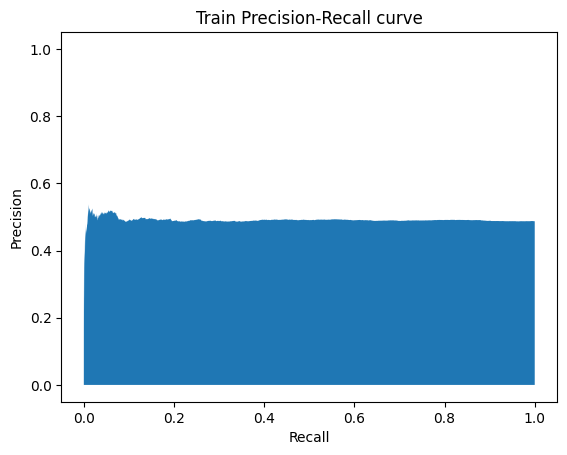

In [27]:
import matplotlib.pyplot as plt
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve")